# Getting the data ready

In [ ]:
# required imports

import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
# downloading as zip file
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-08 16:15:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.143.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.9MB/s    in 3.2s    

2023-02-08 16:15:55 (32.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
# to see all the images in pizza
# !ls pizza_steak/train/pizza

In [ ]:
# to see the no of images
import os 

# walk thorugh pizza_steak directory and list no of images
for dpath, dnames, fnames in os.walk("pizza_steak"):
  print(dpath)
  print(len(fnames))

pizza_steak
0
pizza_steak/train
0
pizza_steak/train/steak
750
pizza_steak/train/pizza
750
pizza_steak/test
0
pizza_steak/test/steak
250
pizza_steak/test/pizza
250


In [ ]:
# get the classnames 
class_names = ["pizza", "steak"]
class_names

['pizza', 'steak']

In [ ]:
# adding the filenames

pizza_filenames_train = os.listdir("pizza_steak/train/pizza")
steak_filenames_train = os.listdir("pizza_steak/train/steak")

In [ ]:
# converting those filenames into paths

pizza_filenames_train = [f"pizza_steak/train/pizza/{i}" for i in pizza_filenames_train]
steak_filenames_train = [f"pizza_steak/train/steak/{i}" for i in steak_filenames_train]

In [ ]:
pizza_filenames_train[:10], steak_filenames_train[:10]

(['pizza_steak/train/pizza/970073.jpg',
  'pizza_steak/train/pizza/32004.jpg',
  'pizza_steak/train/pizza/3314176.jpg',
  'pizza_steak/train/pizza/1165451.jpg',
  'pizza_steak/train/pizza/1209973.jpg',
  'pizza_steak/train/pizza/3763593.jpg',
  'pizza_steak/train/pizza/792093.jpg',
  'pizza_steak/train/pizza/816577.jpg',
  'pizza_steak/train/pizza/1384464.jpg',
  'pizza_steak/train/pizza/929067.jpg'],
 ['pizza_steak/train/steak/2404695.jpg',
  'pizza_steak/train/steak/2826987.jpg',
  'pizza_steak/train/steak/732986.jpg',
  'pizza_steak/train/steak/2509017.jpg',
  'pizza_steak/train/steak/3140083.jpg',
  'pizza_steak/train/steak/1595869.jpg',
  'pizza_steak/train/steak/10380.jpg',
  'pizza_steak/train/steak/3704103.jpg',
  'pizza_steak/train/steak/3577618.jpg',
  'pizza_steak/train/steak/3306627.jpg'])

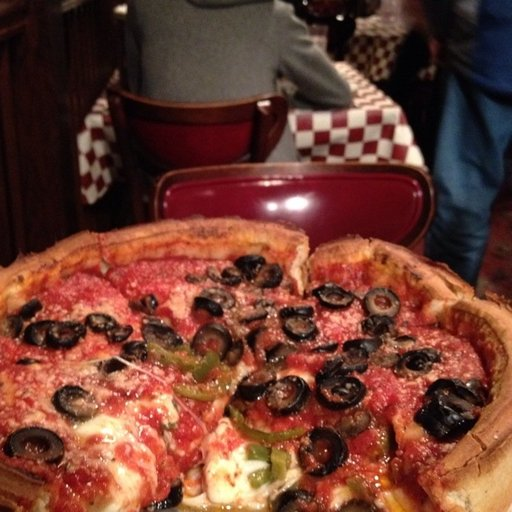

In [ ]:
# pizza image
from IPython.display import Image
Image(pizza_filenames_train[0])

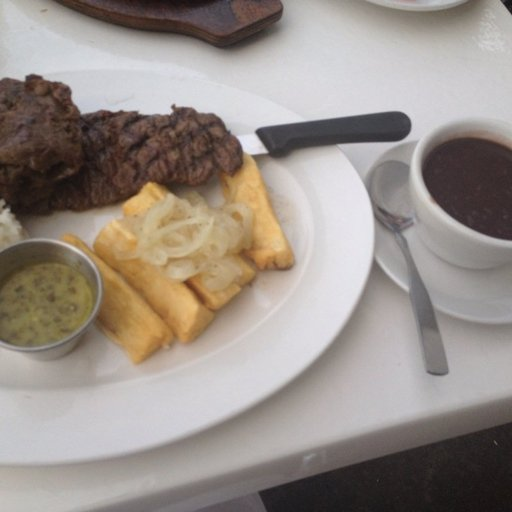

In [ ]:
# steak image
Image(steak_filenames_train[0])

In [ ]:
# adding place values for dataframe

zeros = np.zeros(shape = (750),dtype = np.int64)
ones = np.ones(shape = (750),dtype = np.int64)
imageclass = np.append(zeros,ones)

In [ ]:
# converting to numpy array and adding 2 arrays

pizza_filenames_train = np.array(pizza_filenames_train)
steak_filenames_train = np.array(steak_filenames_train)
filenames = np.append(pizza_filenames_train, steak_filenames_train)

In [ ]:
# creating dataframe with the two arrays
# to create a dataframe with multiple columns use dict 

train_data = pd.DataFrame({"filenames":filenames, "imageclass":imageclass})
train_data

,filenames,imageclass
0,pizza_steak/train/pizza/970073.jpg,0
1,pizza_steak/train/pizza/32004.jpg,0
2,pizza_steak/train/pizza/3314176.jpg,0
3,pizza_steak/train/pizza/1165451.jpg,0
4,pizza_steak/train/pizza/1209973.jpg,0
...,...,...
1495,pizza_steak/train/steak/2233395.jpg,1
1496,pizza_steak/train/steak/3253588.jpg,1
1497,pizza_steak/train/steak/3247009.jpg,1
1498,pizza_steak/train/steak/1658186.jpg,1


In [ ]:
# shuffling the data inorder to learn better for both samples

train_data = train_data.sample(frac = 1, random_state = 42)
train_data

,filenames,imageclass
1116,pizza_steak/train/steak/339891.jpg,1
1368,pizza_steak/train/steak/22080.jpg,1
422,pizza_steak/train/pizza/401701.jpg,0
413,pizza_steak/train/pizza/1705773.jpg,0
451,pizza_steak/train/pizza/1810844.jpg,0
...,...,...
1130,pizza_steak/train/steak/1746626.jpg,1
1294,pizza_steak/train/steak/1822407.jpg,1
860,pizza_steak/train/steak/465494.jpg,1
1459,pizza_steak/train/steak/1550997.jpg,1


(512, 384, 3)


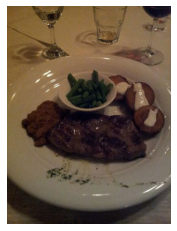

In [ ]:
# converting into tensors and viewing with an array
random_image = tf.constant(plt.imread(random.choice(filenames)))
print(random_image.shape)
plt.imshow(random_image)
plt.axis(False);

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# setup paths to our data directories
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = train_datagen.flow_from_directory(directory = valid_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# build the model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the cnn model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the mode
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data), # seeing the data per batch
                        validation_data = valid_data,
                        validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 24s 240ms/step - loss: 0.5642 - accuracy: 0.7193 - val_loss: 0.3906 - val_accuracy: 0.8420
Epoch 2/10
47/47 [==============================] - 10s 222ms/step - loss: 0.4278 - accuracy: 0.7980 - val_loss: 0.3582 - val_accuracy: 0.8580
Epoch 3/10
47/47 [==============================] - 10s 218ms/step - loss: 0.4015 - accuracy: 0.8247 - val_loss: 0.3457 - val_accuracy: 0.8440
Epoch 4/10
47/47 [==============================] - 10s 217ms/step - loss: 0.3549 - accuracy: 0.8487 - val_loss: 0.3583 - val_accuracy: 0.8500
Epoch 5/10
47/47 [==============================] - 11s 230ms/step - loss: 0.3106 - accuracy: 0.8827 - val_loss: 0.3051 - val_accuracy: 0.8780
Epoch 6/10
47/47 [==============================] - 11s 226ms/step - loss: 0.2675 - accuracy: 0.8847 - val_loss: 0.3045 - val_accuracy: 0.8560
Epoch 7/10
47/47 [==============================] - 11s 225

In [ ]:
# creating other model with replicating from the tf playground

# set random seed
tf.random.set_seed(42)

# model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 0.9217 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# creating model 2 with increased hidden units

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 11s 215ms/step - loss: 4.5652 - accuracy: 0.6040 - val_loss: 0.9057 - val_accuracy: 0.7300
Epoch 2/10
47/47 [==============================] - 10s 207ms/step - loss: 0.9477 - accuracy: 0.6927 - val_loss: 0.6627 - val_accuracy: 0.7180
Epoch 3/10
47/47 [==============================] - 10s 205ms/step - loss: 0.6318 - accuracy: 0.7247 - val_loss: 0.6979 - val_accuracy: 0.6740
Epoch 4/10
47/47 [==============================] - 8s 174ms/step - loss: 0.4990 - accuracy: 0.7793 - val_loss: 0.4608 - val_accuracy: 0.7780
Epoch 5/10
47/47 [==============================] - 10s 206ms/step - loss: 0.6131 - accuracy: 0.7487 - val_loss: 0.4161 - val_accuracy: 0.8160
Epoch 6/10
47/47 [==============================] - 10s 204ms/step - loss: 0.4798 - accuracy: 0.7967 - val_loss: 0.6949 - val_accuracy: 0.7220
Epoch 7/10
47/47 [==============================] - 8s 174ms/step - loss: 0.3945 - accuracy: 0.8340 - val_loss: 0.4829 - val_accuracy: 0.7820
E

# Breaking down

In [ ]:
# preprocess data

train_data = "pizza_steak/train/"
test_dir = "pizza_steak/test"

In [ ]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


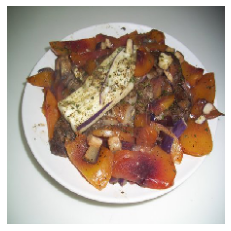

In [ ]:
# get a sample of a train data batch
images, labels = train_data.next()
plt.imshow(images[0])
plt.axis(False);

In [ ]:
# make the creating of our model is little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# create a baseline model
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu",
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
# compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer= Adam(),
                metrics = ["accuracy"])

In [ ]:
# fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 202ms/step - loss: 1.0467 - accuracy: 0.6740 - val_loss: 0.4370 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4344 - accuracy: 0.8173 - val_loss: 0.3799 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3246 - accuracy: 0.8647 - val_loss: 0.4366 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.1831 - accuracy: 0.9487 - val_loss: 0.4313 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0650 - accuracy: 0.9867 - val_loss: 0.4968 - val_accuracy: 0.8240


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


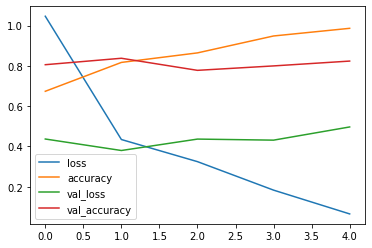

In [ ]:
# evaluating our model

import pandas as pd
pd.DataFrame(history_4.history).plot();

In [ ]:
# plot the validation and training curves separtely

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss 
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure() # to create a new figure
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

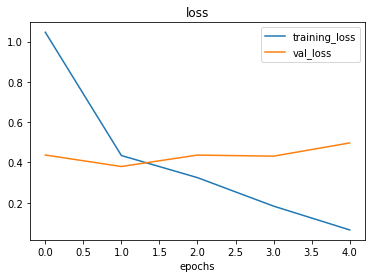

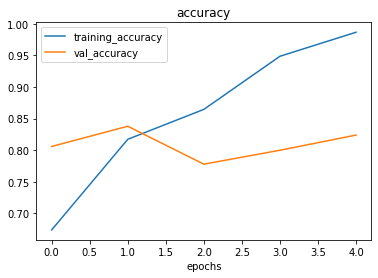

In [ ]:
plot_loss_curves(history_4)

* validatiion loss starts to increase it's likely that the model is overfitting the training dataset. This means it's learning the patterns in the training dataset too well and the model's ability to generalize to unseend data will be diminished.
* generalization - learning the patterns from the training set with the help of that the model has the ability to perform in the unseen data
* overfitting - learning too well in training data
* underfitting - learning worst in the training data
* training and validation curves should head in the same direction

## evaluation metrics
1. accuracy
2. precision
3. recall
4. f1 score

# methods for cnn model

0. create a baseline
1. beat the baseline by overfitting a larget model
2. reduce overfitting

ways to induce overfitting:

* increase the number of conv layers
* increase the number of conv filters
* add another dense layer to the output of our falttened layer

reduce overfitting:

* add data augmentation
* add regularization layers (such as maxpool2d)
* add more data

**Note:** Reduce overfitting is also known as regularization

In [ ]:
# create  the model
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# fit the model
history_5 = model_5.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 11s 213ms/step - loss: 0.6147 - accuracy: 0.6767 - val_loss: 0.5704 - val_accuracy: 0.6560
Epoch 2/10
47/47 [==============================] - 10s 213ms/step - loss: 0.4869 - accuracy: 0.7720 - val_loss: 0.4407 - val_accuracy: 0.7920
Epoch 3/10
47/47 [==============================] - 10s 213ms/step - loss: 0.4316 - accuracy: 0.8133 - val_loss: 0.3917 - val_accuracy: 0.8240
Epoch 4/10
47/47 [==============================] - 9s 188ms/step - loss: 0.4143 - accuracy: 0.8160 - val_loss: 0.3536 - val_accuracy: 0.8400
Epoch 5/10
47/47 [==============================] - 10s 217ms/step - loss: 0.3851 - accuracy: 0.8320 - val_loss: 0.3306 - val_accuracy: 0.8580
Epoch 6/10
47/47 [==============================] - 10s 212ms/step - loss: 0.3573 - accuracy: 0.8480 - val_loss: 0.3952 - val_accuracy: 0.8180
Epoch 7/10
47/47 [==============================] - 9s 192ms/step - loss: 0.3468 - accuracy: 0.8533 - val_loss: 0.3901 - val_accuracy: 0.8120
E

In [ ]:
# model summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

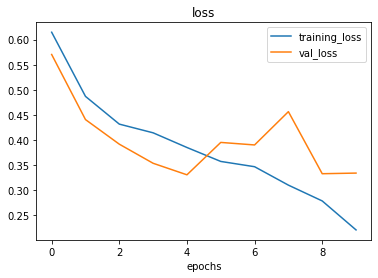

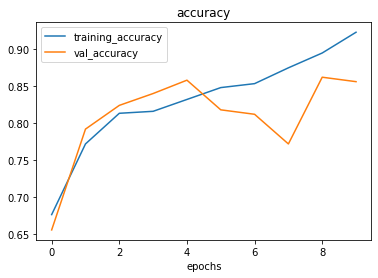

In [ ]:
# plot loss and accuracy curves
plot_loss_curves(history_5)

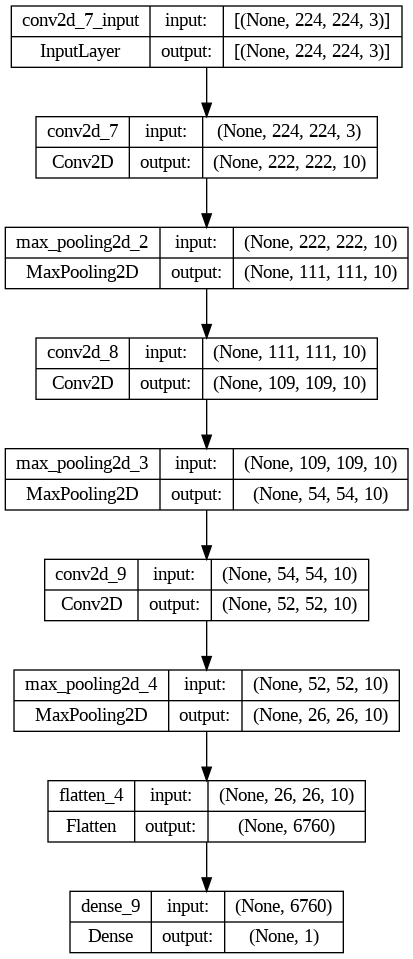

In [ ]:
# model structure
tf.keras.utils.plot_model(model_5, show_shapes = True)

> what is data augmentation?

* data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Alterning might mean adjusting the rotation of an image, flipping it, cropping it or something similar.
* data augmentation is usually only performed on the training data. using build-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# create ImageDataGenerator without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False)

# create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# create non-augmented test data
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

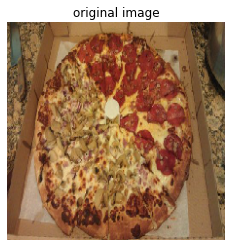

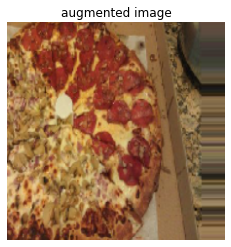

In [ ]:
# show original image and augmented image
import random
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title("original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("augmented image")
plt.axis(False);

In [ ]:
# create a model with augmented data
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# fit the model
history_6 = model_6.fit(train_data_augmented,
                    epochs = 5,
                    steps_per_epoch = len(train_data_augmented),
                    validation_data = test_data,
                    validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 524ms/step - loss: 0.7110 - accuracy: 0.4320 - val_loss: 0.6860 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6983 - accuracy: 0.5700 - val_loss: 0.6897 - val_accuracy: 0.5360
Epoch 3/5
47/47 [==============================] - 25s 530ms/step - loss: 0.6917 - accuracy: 0.5380 - val_loss: 0.6424 - val_accuracy: 0.6060
Epoch 4/5
47/47 [==============================] - 24s 499ms/step - loss: 0.6607 - accuracy: 0.6080 - val_loss: 0.5689 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 24s 519ms/step - loss: 0.6840 - accuracy: 0.5920 - val_loss: 0.6443 - val_accuracy: 0.6940


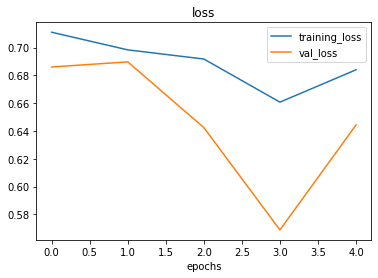

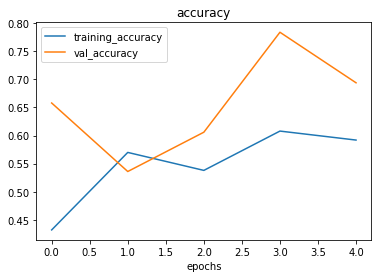

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size = (224,224),
                                                                     class_mode = "binary",
                                                                     batch_size = 32,
                                                                     shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
# create a model fit it with shuffled augmented data
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps =len(test_data))


Epoch 1/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6555 - accuracy: 0.6013 - val_loss: 0.6326 - val_accuracy: 0.5680
Epoch 2/5
47/47 [==============================] - 24s 518ms/step - loss: 0.5861 - accuracy: 0.7040 - val_loss: 0.3970 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 25s 524ms/step - loss: 0.5136 - accuracy: 0.7520 - val_loss: 0.3616 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 24s 506ms/step - loss: 0.4897 - accuracy: 0.7707 - val_loss: 0.3581 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 24s 499ms/step - loss: 0.4800 - accuracy: 0.7673 - val_loss: 0.3751 - val_accuracy: 0.8300


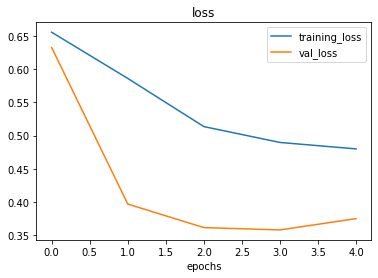

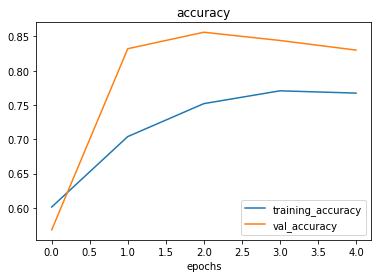

In [ ]:
# plot loss and accuracy curves
plot_loss_curves(history_7)

> when shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features accross a wide array of images

# improving the model

* increase the number of model layers (eg: more conv2d/maxpool2d layers)
* increase the number of filters in each convolutional layer(eg: from 10 to 32 or even 64)
* train for longer (more epochs)
* find an ideal learning rate
* get more data (give the model more opportunities to learn)
* use transfer learning to leverage what another image model has learn and adjuct it for our own use case

In [ ]:
# using the cnn explainer model
model_8 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2, padding = "valid"),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_8.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])
history_8 = model_8.fit(train_data_augmented_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 529ms/step - loss: 0.6953 - accuracy: 0.5813 - val_loss: 0.5729 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 25s 527ms/step - loss: 0.5609 - accuracy: 0.7280 - val_loss: 0.4344 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 31s 666ms/step - loss: 0.5166 - accuracy: 0.7587 - val_loss: 0.3798 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 25s 526ms/step - loss: 0.5305 - accuracy: 0.7380 - val_loss: 0.3868 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5370 - accuracy: 0.7453 - val_loss: 0.4051 - val_accuracy: 0.8180


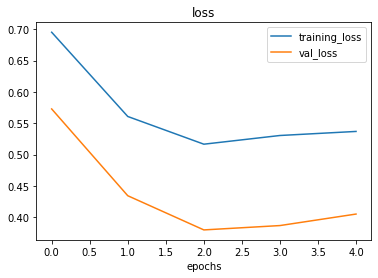

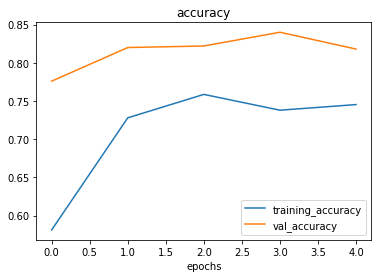

In [ ]:
plot_loss_curves(history_8)

In [ ]:
# view our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-02-08 16:34:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2023-02-08 16:34:36 (70.4 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



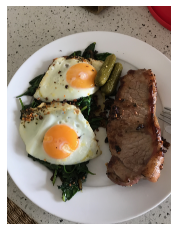

In [ ]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# function to import image and resize it 
def load_and_prep_image(filename, img_shape = 224):
  
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image
  img = img/255.
  img = tf.expand_dims(img, axis = 0)
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
predicted_value = model_8.predict(steak)
predicted_value

1/1 [==============================] - 0s 23ms/step


array([[0.7838175]], dtype=float32)

In [ ]:
# plot predict image and value
def plot_predict(model, image_name, class_names = class_names):
  img = load_and_prep_image(image_name)
  predicted_value = class_names[int(tf.round(model.predict(img)))]
  plt.imshow(tf.reshape(img, shape = [224, 224,3]))
  plt.title(f"predicted value: {predicted_value}")
  plt.axis(False);

1/1 [==============================] - 0s 78ms/step


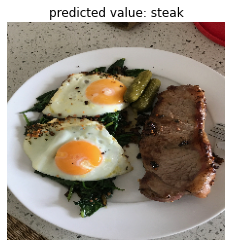

In [ ]:
# predicting steak image
plot_predict(model_8, "03-steak.jpeg")

In [ ]:
# getting pizza image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-02-08 16:57:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-02-08 16:57:25 (109 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 19ms/step


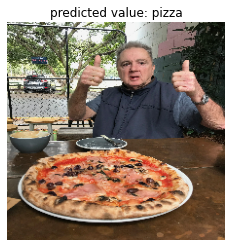

In [ ]:
# predicting pizza image
plot_predict(model_8, "03-pizza-dad.jpeg")

In [ ]:
pizza = load_and_prep_image("03-pizza-dad.jpeg")
model_8.predict(pizza)

1/1 [==============================] - 0s 30ms/step


array([[0.22553144]], dtype=float32)

In [ ]:
create final model with 2 neurons in the output layer